# 🌅 Create The Horizon Graph Using Python

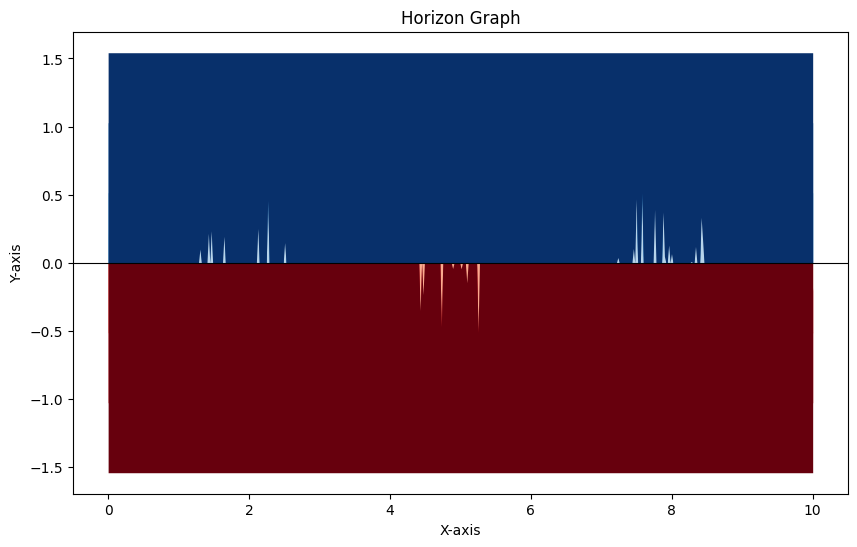

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create sample data
np.random.seed(42)
x = np.linspace(0, 10, 500)
y = np.sin(x) + 0.5 * np.random.randn(500)

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Normalize data into bands
bands = 4  # Number of bands
band_height = max(df['y']) / bands
df['band'] = (df['y'] // band_height).astype(int)

# Split positive and negative values for coloring
df['positive'] = df['y'].clip(lower=0)
df['negative'] = df['y'].clip(upper=0)

# Define the horizon plot function
def horizon_plot(df, bands, band_height):
    cmap_positive = ListedColormap(plt.cm.Blues(np.linspace(0.3, 1, bands)))
    cmap_negative = ListedColormap(plt.cm.Reds(np.linspace(0.3, 1, bands)))

    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(bands):
        # Positive bands
        positive_band = (df['positive'] - i * band_height).clip(lower=0, upper=band_height)
        ax.fill_between(df['x'], positive_band, i * band_height, 
                        color=cmap_positive(i), lw=0)

        # Negative bands
        negative_band = (df['negative'] + i * band_height).clip(upper=0, lower=-band_height)
        ax.fill_between(df['x'], negative_band, -i * band_height, 
                        color=cmap_negative(i), lw=0)

    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title("Horizon Graph")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    plt.show()

# Plot the horizon graph
horizon_plot(df, bands, band_height)
